In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels

path_sign_mnist_train = f"{getcwd()}/tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
print(training_images.shape)
print(testing_images.shape)
    

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=10
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=10
)

history = model.fit_generator(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
2746/2746 [==============================] - 158s 57ms/step - loss: 2.5217 - accuracy: 0.2158 - val_loss: 1.6176 - val_accuracy: 0.4573
Epoch 2/10
2746/2746 [==============================] - 154s 56ms/step - loss: 1.6856 - accuracy: 0.4501 - val_loss: 1.1146 - val_accuracy: 0.5926
Epoch 3/10
2746/2746 [==============================] - 161s 59ms/step - loss: 1.3105 - accuracy: 0.5686 - val_loss: 0.7847 - val_accuracy: 0.7164
Epoch 4/10
2746/2746 [==============================] - 160s 58ms/step - loss: 1.0850 - accuracy: 0.6412 - val_loss: 0.8451 - val_accuracy: 0.6970
Epoch 5/10
2746/2746 [==============================] - 155s 56ms/step - loss: 0.9245 - accuracy: 0.6877 - val_loss: 0.5449 - val_accuracy: 0.8172
Epoch 6/10
2746/2746 [==============================] - 157s 57ms/step - loss: 0.8073 - accuracy: 0.7270 - val_loss: 0.4654 - val_accuracy: 0.8318
Epoch 7/10
2746/2746 [==============================] - 160s 58ms/step - loss: 0.7233 - accuracy: 0.7575 - val_loss: 0

KeyboardInterrupt: 

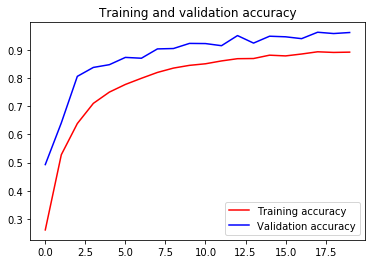

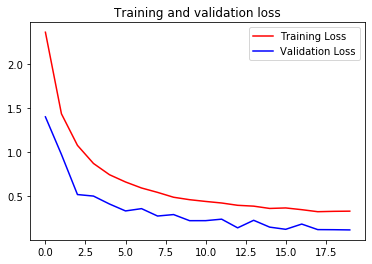

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()